# Lab 7 KNN Classification






In [1]:
from sklearn.datasets import load_breast_cancer
# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target
print("Original Shape:", X.shape)

Original Shape: (569, 30)


In [5]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def classify_and_evaluate(X, Y, method_name="KNN",k=5):


    X_train, X_test, y_train, y_test = train_test_split(
        X, Y, test_size=0.3, random_state=42
    )

    clf = knn(n_neighbors=5) # Added n_neighbors parameter, max_iter is not for KNN
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n=== {method_name} Evaluation ===")
    print(f"Accuracy   : {acc:.4f}")
    print(f"Precision  : {prec:.4f}")
    print(f"Recall     : {rec:.4f}")
    print(f"F1 Score   : {f1:.4f}")

    # Scatter plot
    plt.figure(figsize=(6,5))
    plt.scatter(range(len(y_test)), y_test, label="Actual", alpha=0.7, c="blue")
    plt.scatter(range(len(y_pred)), y_pred, label="Predicted", alpha=0.7, c="red", marker="x")
    plt.title(f"{method_name}: Actual vs Predicted")
    plt.xlabel("Sample Index")
    plt.ylabel("Class")
    plt.legend()
    plt.show()

    return {"Method": method_name, "Accuracy": acc, "Precision": prec, "Recall": rec, "F1": f1}


=== KNN Evaluation ===
Accuracy   : 0.9591
Precision  : 0.9469
Recall     : 0.9907
F1 Score   : 0.9683


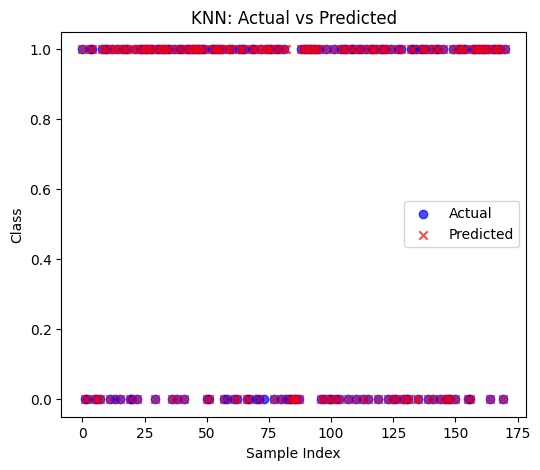

In [6]:
result_knn = classify_and_evaluate(X, y, "KNN",k=5)